In [ ]:
!pip install fastparquet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
%%time
df = pd.read_parquet('../data/parking_violations_full.parquet')

CPU times: user 33.4 s, sys: 2.22 s, total: 35.6 s
Wall time: 35.6 s


In [3]:
# Drop noisy columns

df = df.drop(columns=['the_geom', 'issue_datetime', 'state', 'the_geom_webmercator', 'division', 'issuing_agency', 'gps'])
df[:15]

,zip_code,anon_ticket_number,anon_plate_id,violation_desc,fine,lat,lon,location
0,,7592335,973855,METER EXPIRED,26,40.0042385585576,-75.148956315657,1200 W ONTARIO ST
1,,7592336,973855,EXPIRED INSPECTION,41,40.0042385585576,-75.148956315657,1200 W ONTARIO ST
2,19118,7592337,950854,METER EXPIRED,26,40.0768252786875,-75.2077767172593,8600 GERMANTOWN AVE
3,19107,7592338,927201,METER EXPIRED CC,36,39.9501059938637,-75.1578482560808,1013 CHESTNUT ST
4,19107,7592339,927201,METER EXPIRED CC,36,39.9497133332977,-75.1547051096464,800 CHESTNUT ST
5,19148,7592340,237626,METER EXPIRED,26,39.9267674436283,-75.1671307768729,1899 E PASSYUNK AVE
6,19148,7592341,1491040,OVER TIME LIMIT,26,39.9292181858995,-75.1682716287018,1399 MORRIS ST
7,19107,7592342,933711,METER EXPIRED CC,36,39.9561218166047,-75.1541159228532,234 N 9TH ST
8,19103,7592343,52438,PASSENGR LOADNG ZONE,31,39.9517588612877,-75.1711259018388,1809 CHESTNUT ST
9,,7592344,956893,STOPPING PROHIBITED,51,40.0418882993841,-75.1359970739654,900 W NEDRO AVE


In [4]:
# Convert columns to numeric values

df[['zip_code','lat', 'lon', 'fine']] = df[['zip_code','lat', 'lon', 'fine']].apply(pd.to_numeric)
df['zip_code'] = df['zip_code'].fillna(97000)
df['zip_code'] = df['zip_code'].apply(np.int64)
df[:15]

,zip_code,anon_ticket_number,anon_plate_id,violation_desc,fine,lat,lon,location
0,97000,7592335,973855,METER EXPIRED,26.0,40.004239,-75.148956,1200 W ONTARIO ST
1,97000,7592336,973855,EXPIRED INSPECTION,41.0,40.004239,-75.148956,1200 W ONTARIO ST
2,19118,7592337,950854,METER EXPIRED,26.0,40.076825,-75.207777,8600 GERMANTOWN AVE
3,19107,7592338,927201,METER EXPIRED CC,36.0,39.950106,-75.157848,1013 CHESTNUT ST
4,19107,7592339,927201,METER EXPIRED CC,36.0,39.949713,-75.154705,800 CHESTNUT ST
5,19148,7592340,237626,METER EXPIRED,26.0,39.926767,-75.167131,1899 E PASSYUNK AVE
6,19148,7592341,1491040,OVER TIME LIMIT,26.0,39.929218,-75.168272,1399 MORRIS ST
7,19107,7592342,933711,METER EXPIRED CC,36.0,39.956122,-75.154116,234 N 9TH ST
8,19103,7592343,52438,PASSENGR LOADNG ZONE,31.0,39.951759,-75.171126,1809 CHESTNUT ST
9,97000,7592344,956893,STOPPING PROHIBITED,51.0,40.041888,-75.135997,900 W NEDRO AVE


In [5]:
# Drop any rows with NaN in lat and lon

df.dropna(subset=['lat','lon'],inplace=True)
df.reset_index(drop=True, inplace=True)
df[:15]

,zip_code,anon_ticket_number,anon_plate_id,violation_desc,fine,lat,lon,location
0,97000,7592335,973855,METER EXPIRED,26.0,40.004239,-75.148956,1200 W ONTARIO ST
1,97000,7592336,973855,EXPIRED INSPECTION,41.0,40.004239,-75.148956,1200 W ONTARIO ST
2,19118,7592337,950854,METER EXPIRED,26.0,40.076825,-75.207777,8600 GERMANTOWN AVE
3,19107,7592338,927201,METER EXPIRED CC,36.0,39.950106,-75.157848,1013 CHESTNUT ST
4,19107,7592339,927201,METER EXPIRED CC,36.0,39.949713,-75.154705,800 CHESTNUT ST
5,19148,7592340,237626,METER EXPIRED,26.0,39.926767,-75.167131,1899 E PASSYUNK AVE
6,19148,7592341,1491040,OVER TIME LIMIT,26.0,39.929218,-75.168272,1399 MORRIS ST
7,19107,7592342,933711,METER EXPIRED CC,36.0,39.956122,-75.154116,234 N 9TH ST
8,19103,7592343,52438,PASSENGR LOADNG ZONE,31.0,39.951759,-75.171126,1809 CHESTNUT ST
9,97000,7592344,956893,STOPPING PROHIBITED,51.0,40.041888,-75.135997,900 W NEDRO AVE


In [6]:
X = df.loc[:,['lat','lon']]

In [7]:
%%time 

# Run K-Means

id_n = 8
kmeans = KMeans(n_clusters=id_n, random_state=0, n_jobs=-1).fit(X) # n_jobs = -1 means use all available processors
id_label=kmeans.labels_

CPU times: user 5.04 s, sys: 1.47 s, total: 6.52 s
Wall time: 49.3 s


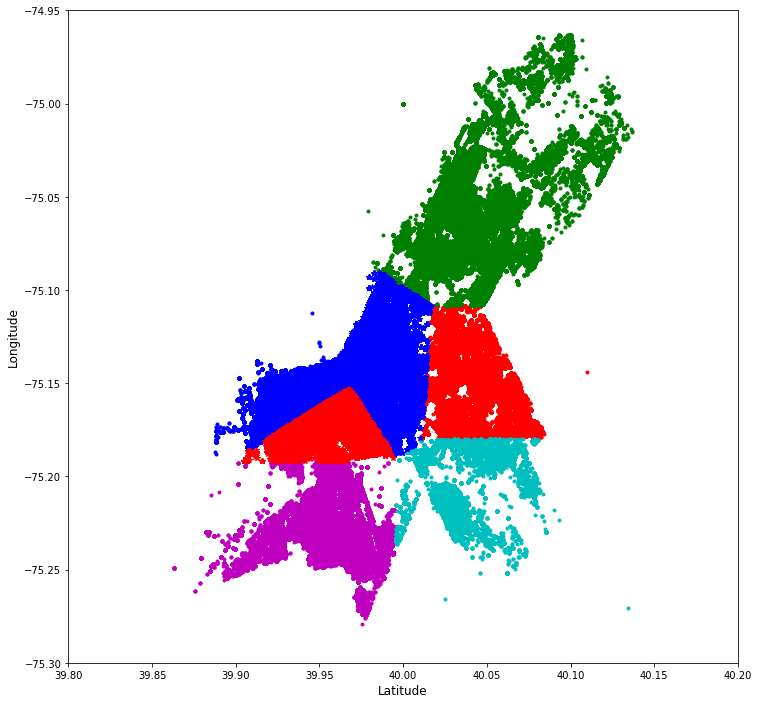

In [8]:
# Plot Results

plot_colors = np.array(['b.', 'r.', 'm.', 'g.', 'c.', 'k.', 'b*', 'r*', 'm*', 'r^'])

plt.figure(figsize=(12, 12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylim([-75.3, -74.95])
plt.xlim([39.8, 40.2])

for i in range(id_n):
    cluster = np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values, X.lon[cluster].values, plot_colors[i])
plt.show()